In [1]:
import simcmb

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
Yd0 = simcmb.yam_io.Ydict("../simcmb/settings/planck_2018_1e4.yaml")
PM0 = simcmb.camb_ps_maker.PS_Maker(Yd0)

FileNotFoundError: [Errno 2] No such file or directory: '../simcmb/settings/planck_2018_1e4.yaml'

from 15:35:48.881630 P to 15:35:50.227519 P or 1.345889 seconds total
from 15:35:50.236691 P to 15:35:51.621688 P or 1.384997 seconds total
from 15:35:51.622826 P to 15:35:52.965892 P or 1.343066 seconds total
from 15:35:52.967073 P to 15:35:54.361099 P or 1.394026 seconds total
from 15:35:54.362177 P to 15:35:55.725245 P or 1.363068 seconds total
from 15:35:55.726358 P to 15:35:57.113265 P or 1.386907 seconds total
from 15:35:57.114322 P to 15:35:58.563835 P or 1.449513 seconds total
from 15:35:58.564985 P to 15:35:59.923537 P or 1.358552 seconds total
from 15:35:59.924556 P to 15:36:01.277272 P or 1.352716 seconds total


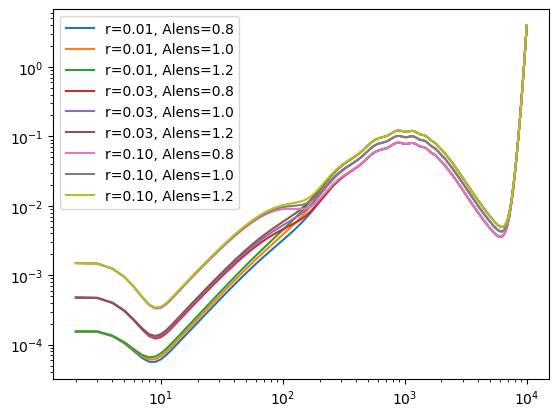

In [8]:
for r, a in itertools.product(Yd0.rs, Yd0.As):
    PM0.update_vals("r", r, incamb=True)
    PM0.update_vals("Alens", a, incamb=True)
    cl0 = PM0.get_cls(PM0.Ydict.pars)
    plt.plot(cl0['l'][2:], cl0['clBB'][2:], label=f"r={r:.2f}, Alens={a}")
#     plt.plot(cl0['l'][2:], cl0['clEE'][2:], label='EE')
#     plt.plot(cl0['l'][2:], cl0['clBB'][2:], label='BB')
plt.loglog()
plt.legend()
plt.show()

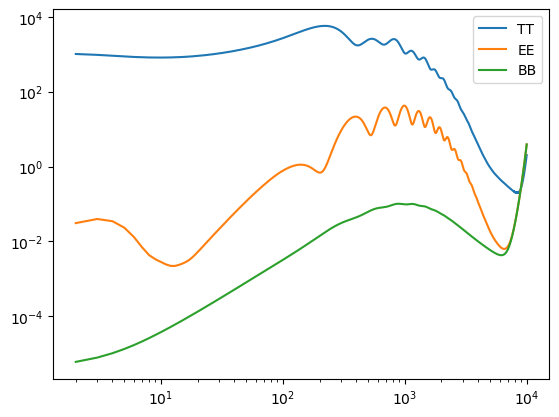

In [5]:
plt.plot(cl0['l'][2:], cl0['clTT'][2:], label='TT')
plt.plot(cl0['l'][2:], cl0['clEE'][2:], label='EE')
plt.plot(cl0['l'][2:], cl0['clBB'][2:], label='BB')
plt.loglog()
plt.legend()
plt.show()

In [6]:
PM0.update_vals('noise_level', 8, incamb=False)

In [7]:
cl1 = PM0.get_cls(PM0.Ydict.pars)

from 16:57:01.797036 P to 16:57:03.170691 P or 1.373655 seconds total


In [8]:
PM0.update_vals('beam_fwhm', 6, incamb=False)

In [9]:
cl2 = PM0.get_cls(PM0.Ydict.pars)

from 16:57:03.177163 P to 16:57:04.371313 P or 1.194150 seconds total


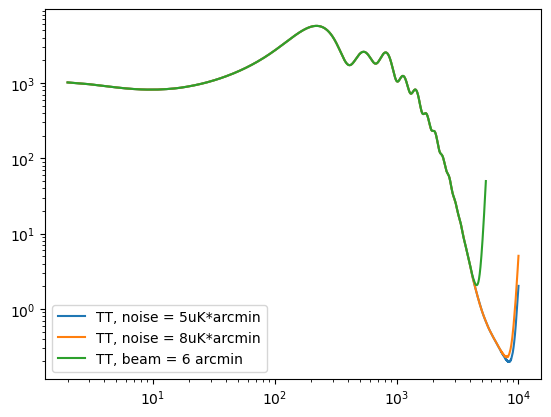

In [10]:
plt.plot(cl0['l'][2:], cl0['clTT'][2:], label='TT, noise = 5uK*arcmin')
plt.plot(cl1['l'][2:], cl1['clTT'][2:], label='TT, noise = 8uK*arcmin')
plt.plot(cl2['l'][2:], cl2['clTT'][2:], label='TT, beam = 6 arcmin')
plt.loglog()
plt.legend()
plt.show()

In [11]:
f1 = clplotting.flatmap(192, 5, cl_dict=cl0)

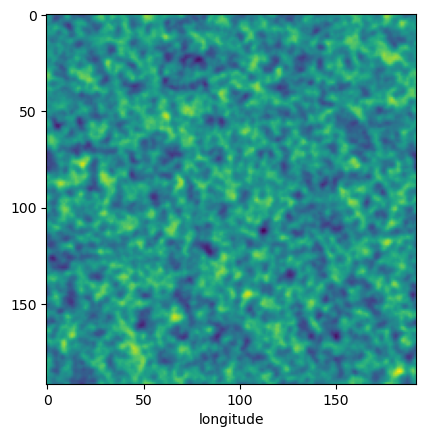

In [12]:
plt.imshow(f1.flatmap('T', seed = 0)[0])
plt.xlabel("longitude")
plt.xticks(range(0,200,50))
plt.yticks(range(0,200,50))
plt.show()

In [13]:
np.sum(f1.flatmap('T', seed = 0)[0] - f1.flatmap('T', seed = 0)[0]),\
np.sum(f1.flatmap('T', seed = 1)[0] - f1.flatmap('T', seed = 0)[0])

(0.0, -2192.2957996204495)

In [14]:
f1.flatmap('TEB').shape

(3, 192, 192)

In [15]:
f1.flatmap('TQU').shape

(3, 192, 192)

In [16]:
f2 = clplotting.flatmap(192, 5)
f2.flatmap('what')

if you don't want to restrict to a `cl_dict` dictionary, use `self._flatmap` instead


In [17]:
f1.flatmap('E'), f1.flatmap('EE'), f1.flatmap('clEE')

(array([[[-1179.96195586,   250.15471568,  2818.75442381, ...,
          -3953.63869443, -3058.93065602, -1109.11764054],
         [  342.61797782,   985.12036487,  2593.88799747, ...,
          -4027.62534082, -1844.27004459, -1042.58547353],
         [  780.65983506,  2331.35010788,  2303.96555043, ...,
          -2491.84302847, -1012.25032246,   661.82868897],
         ...,
         [ -206.96296481,  3410.9824812 ,  3999.95277713, ...,
          -3447.07528179, -4188.84327091, -2701.20725964],
         [  130.54863098,  2203.65999362,  3523.62963972, ...,
          -3311.29630194, -3892.98447471, -2647.22750447],
         [ -703.1466697 ,  1024.5228671 ,  3329.51046594, ...,
          -3493.30820297, -3279.24094819, -1929.0271612 ]]]),
 array([[[ -858.88491607,  -273.12027884,  1087.68039353, ...,
           1649.7130569 ,  -340.9106619 , -2173.04005032],
         [ -972.60365556,  -208.72869668, -1344.46375539, ...,
           1550.33174903,   -68.08946549,  -997.57830311],
       

In [18]:
f1.flatmap('K')

not a valid map specification


In [19]:
PM0.update_vals('Alens', 1.05, incamb=True)

In [20]:
cl3 = PM0.get_cls(PM0.Ydict.pars)

from 16:57:04.870191 P to 16:57:05.999750 P or 1.129559 seconds total


In [21]:
PM0.update_vals('r', 0.05, incamb=True)

In [22]:
cl4 = PM0.get_cls(PM0.Ydict.pars)

from 16:57:06.006735 P to 16:57:07.135497 P or 1.128762 seconds total


In [23]:
yi.savecls([cl0, cl3, cl4], "/Users/sammcd/Desktop/test_save_cls", permission='r+')

skipping because r0.0/Alens1.0/l already exists and overwrite set to False
skipping because r0.0/Alens1.0/clTT already exists and overwrite set to False
skipping because r0.0/Alens1.0/clEE already exists and overwrite set to False
skipping because r0.0/Alens1.0/clBB already exists and overwrite set to False
skipping because r0.0/Alens1.0/clTE already exists and overwrite set to False
skipping because r0.0/Alens1.0/clPP already exists and overwrite set to False
skipping because r0.0/Alens1.0/clPT already exists and overwrite set to False
skipping because r0.0/Alens1.0/clPE already exists and overwrite set to False
skipping because r0.0/Alens1.0/lensed_CLs already exists and overwrite set to False
skipping because r0.0/Alens1.0/r already exists and overwrite set to False
skipping because r0.0/Alens1.0/Alens already exists and overwrite set to False
skipping because r0.0/Alens1.05/l already exists and overwrite set to False
skipping because r0.0/Alens1.05/clTT already exists and overwrite

In [43]:
PM0.Ydict.pars.Alens

1.05